# 개요

- AI > 머신러닝 > 지도학습 > 분류상의 존재하는 알고리즘이 학습후 어떤 성능을 내는지 평가하는 도구 / 방법
- 기본적인 도구
  - 혼동형렬(오차행렬)을 이용하여 평가 잣대를 구성한다

# 혼동행렬 (Confusion Matrix)

## 구성

- 구성요소 ( 2x2, 총 4개의 조합이 나온다)
- 요소 1
  - Positive : 긍정, P
  - Negative : 부정, N
- 요소 2
  - True  : T, 예측한 값과 실제가 동일
  - False : F, 예측한 값과 실제가 상이

## Case

- 주의 사항 : 명제에 대해서 실제 상황이 긍정적일수도, 부정적일수 있다. 텍스트가 가지고 있는 실제 상황에 감정 이입을 하지 말고 판단 -> 혼동상황을 벗어날수 있다
- 명제
  - 암이 있다 : Positive, P
  - 암이 없다 : Negative, N
  - 총 케이스 
    - TP, TN, FP, FN
- TP
  - 암이 있다고 예측하였는데, 실제로 암이 있었다

- TN
  - 암이 없다고 예측하였는데, 실제로 암이 없었다

- FP
  - 암이 있다고 예측하였는데, 실제로 암이 없었다
  
- FN
  - 암이 없다고 예측하였는데, 실제로 암이 있었다

- **정확도**
  - accuracy
  - 식 = (TP + TN) / (TP + TN +FP +FN)
  - 식 = (예측한 결과와 실제값이 동일한 건수) / (예측한 총건수)
  - 모델이 입력된 데이터에 대하 얼마나 정확하게 예측하는지를 가늠하는 값
  - %로 표현됨

- **정밀도**
  - precision
  - P라고 응답한 전체 비율중에 T의 비율
  - 암이 있다고 진단한 전체 케이스 중에서 실제로 있엇던 비율
  - 식(P) = TP / (TP + FP)

- **재현율**
  - recall
  - 실제로 암이 있는 환자들중에서 병원에 갔을대 암환자라고 예측한 확률 -> 이 병원은 암환자를 잘 찾아낸다
  - 조기에 정확하게 발견해서 신속하게 처방 및 치료하는 암 진단에는 중요한 지표가 될수 있다
  - 식(R) = TP / (TP + FN)

- **F1-Score**
  - 조화평균
  - 모델의 성능을 판단하는데 P or R등 둘중 어느쪽에 비중을 둬야 할지 모를때 사용
  - F1 = 2 / ( 1/P + 1/R )
  - F1 = 2*(P*R) / ( P + R )

- 특이성
  - 실제 암이 없는 전체 데이터 중에 참 부정 비율
  - 식 = TN / (TN + FP)

- ROC 커브(곡선)
  - 참긍정(양성)비율(tpr)에 대한 거짓긍정(양성)비율(fpr) 곡선
  - AUC
    - ROC 곡선 하(아래) 면적 
    - AUC값을 통해서 최적 알로리즘을 분류해 된다
      - 상위권에 몇개 알고리즘을 후보로 두고 각각 최적화 진행해서 선별

  - 거짓긍정(양성)비율(fpr) = 1 - 특이성

- 정리
  - **타겟의 값으로 예측시 분류 평가 지표 : 정확도, 정밀도, 재현율, F1-Score**
  - **타겟의 확률로 예측시 분류 평가 지표 : AUC, 로그손실**

## 지표별 우선순위 예시

- 비즈니스 혹은 주제별로 다른 기준이 우선된다

- case 1
  - 비가 오는 날을 예측하는 모델
  - 실제 100일동안 총 3일만 비가 왔다
  - 모델은 100일동안 비가 오지 않는다라고 예측
    - 정확도는 97/100 => 97%
    - **비가 오는날을 한번도 못맞췄다**

- case 2
  - 스펨 메일 분류하는 모델
  - 메일 100개 중에 스펨이 5개가 있었다
  - 모델은 100개가 모두 정상이라고 했다 
    - 정확도 95%
    - 정작 스펨메일을 하나도 못 찾았다

- 굿 케이스 기준
  - 암 환자 예측, 보험 사기 예측등등 -> 적발 하는 모델
    - 재현율이 정밀도보다 중요하다
  - 스펨메일 여부 분류
    - 정밀도가 중요
  - 전체 데이터 대비 중요한 데이터가 소량이라면
    - F1-score 중요
  - 가장 베스트 
    - 모든 접수를 높게 받는다면!!

# 타겟의 값으로 예측시 분류 평가 지표

In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

## 실제 코드 적용

### 데이터 획득 (sklearn)


- 함수
  - fetch_xxxx()
    - 데이터가 커서, 요청시 다운로드 진행
  - load_xxxx()
    - 패키지 설치시 바로 설치되어 있음
  - make_xxxx()
    - 더미 데이터를 생성해서 제공

# 간단한 붓꽃 데이터 분류 예시에 적용

## 연구 목표 

- 머신러닝 > 분류 > 성능평가 테스트
- ROC, AUC 에 대한 적용
- 이를 통한 최적 알고리즘 선택
- 많은 불필요한 부분은 생략

## 데이터 획득

- sklearn에서 제공하는 예시 데이터 활용
- 붓꽃(iris)

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
law_data = load_iris()
print( law_data.DESCR )

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 데이터 준비 및 데이터 분석 EDA

In [7]:
# sklearn.utils.Bunch : sklearn에서 데이터를 공급할때 사용하는 클레스형 
'''
'DESCR', : 설명
'data',  : 피처(특성) 데이터
'data_module',
'feature_names', : 피처 이름
'filename',
'frame',
'target', : 정답 데이터
'target_names' : 정답 이름들 -> 범주형일 가능성이 높음
'''
type(law_data), dir( law_data )

(sklearn.utils.Bunch,
 ['DESCR',
  'data',
  'data_module',
  'feature_names',
  'filename',
  'frame',
  'target',
  'target_names'])

In [8]:
law_data.target_names, law_data.feature_names, law_data.data.shape, law_data.target.shape

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 (150, 4),
 (150,))

- 데이터프레임 구성

In [9]:
# 피처 데이터로만 df 구성
df = pd.DataFrame( law_data.data, columns=law_data.feature_names )
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
# 정답은 0, 1, 2로 구성되어 있고, 실제값은 law_data.target_names으로 확인 가능
# 범주형 데이터, 단지 구분하기위해서만 0, 1, 2로 레이블인코딩이 자동 적용되었다
law_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# 정답 컬럼 추가
df['species'] = law_data.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


## 모델 구축(성능평가에만 집중)

- 이 주제는 머신러닝 > 분류의 문제이다
- 성능 평가를 통해서 이 데이터를 잘 분류하는 모델을 선택하는데 목적
  - auc, roc 사용

In [1]:
# 알고리즘 선택 -> 분류에서 찾는다
from sklearn.linear_model import LogisticRegression      # 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier          # 결정트리
from sklearn.ensemble import RandomForestClassifier      # 랜덤포레스트(동일 알고리즘 n개-결정트리)
from sklearn.naive_bayes import GaussianNB               # 가우시안 바이브베이즈 (텍스트에 적합...)
from sklearn.svm import SVC                              # 서포트백터머신 분류

# 알고리즘 생성은 한번에 밑에서 처리하겠다

In [2]:
# 평가도구
from sklearn.metrics import auc, roc_curve  

In [12]:
# 데이터 준비 -> (훈련용, 테스트용), 검증용(생략)-k폴드
# 75:25 (가급적 비율을 지키면 좋지만, 절대적인 것은 아님)
from sklearn.model_selection import train_test_split

X = df.iloc[ :, :-1] # (150, 4)
y = df.iloc[ :, -1: ] # (150,1)
X.shape, y.shape

((150, 4), (150, 1))

In [ ]:
X.head(1)

In [ ]:
y.head(1)

In [13]:
# 정답이 3개에서 2개로 줄인다 => 다중분류 -> 이진분류로 교체
yy = y == 1
yy

,species
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [14]:
# 데이터가 적어서 테스트 데이텨량을 많이 늘렸다 -> 연습용이기 때문에 자유롭게 구성
# random_state : 데이터 분해할때 사용되는 난수값의 시드를 고정할것인가? 고정하면 
# 매번 같은 구성으로 데이터가 분해 및 조합(훈련/테스트), 아니면 -> 시간이 시드가 되서 
# 시간은 계속 흐러니까 함수를 돌릴때만다 다른 조합으로 구성된다
# random_state=1 : 임의의 설정값으로 시드 지정 => 난수가 밣생되는 순서가 항상 동일하다 -> 항상 같은 조합으로 섞인다
X_train, X_test, y_train, y_test = train_test_split( X, yy, test_size=0.7, random_state=1)

In [15]:
# 여기서는 임의로 테스트용 데이터를 더 많이 배체했다
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 4), (105, 4), (45, 1), (105, 1))

In [16]:
y_test.values

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

- 난수 시드

  - 파이썬, 넘파이, 머신러닝 알고리즘, 딥러닝 엔진등등 다 고정해서 사용
  - 최적화중 특정 난수시드값에 정확도가 상승하는 패턴이 존재함

In [16]:
import random, string

In [18]:
values =  list( string.ascii_lowercase )
print( values )

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [20]:
random.shuffle(values)
print( values )

['c', 'y', 'e', 'q', 's', 'r', 'z', 'g', 'f', 'k', 'j', 'p', 'l', 'v', 'h', 'n', 'a', 'u', 'w', 'i', 'x', 'd', 'm', 'b', 't', 'o']


In [21]:
random.shuffle(values)
print( values )

['f', 'y', 'k', 'w', 'h', 'o', 'g', 'x', 'b', 'r', 'i', 'e', 'q', 'a', 'd', 't', 'v', 'm', 'j', 'z', 'l', 's', 'u', 'c', 'n', 'p']


In [27]:
random.seed(1)
values =  list( string.ascii_lowercase )
random.shuffle(values)
print( values )
random.shuffle(values)
print( values )

['x', 'y', 'l', 'k', 'w', 'b', 'f', 'z', 't', 'n', 'j', 'r', 'q', 'a', 'h', 'v', 'g', 'm', 'u', 'o', 'p', 'd', 'i', 'c', 's', 'e']
['w', 'n', 'y', 'i', 'l', 'h', 'o', 'r', 'j', 'b', 'k', 't', 'u', 'v', 'c', 'z', 'g', 'd', 'a', 'f', 'q', 's', 'm', 'p', 'e', 'x']


- 학습을 위해 알고리즘 생성

In [54]:
'''
from sklearn.linear_model import LogisticRegression      # 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier          # 결정트리
from sklearn.ensemble import RandomForestClassifier      # 랜덤포레스트(동일 알고리즘 n개-결정트리)
from sklearn.naive_bayes import GaussianNB               # 가우시안 바이브베이즈 (텍스트에 적합...)
from sklearn.svm import SVC                              # 서포트백터머신 분류
'''
als = {
  'LogisticRegression'    :('-',  LogisticRegression()),
  'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5)),
  'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)),
  'GaussianNB'            :(':',  GaussianNB()),
  #'SVC'                   :('-',  SVC()),
}

- 반복적으로 진행
  - 학습 -> 예측 -> 성능평가 -> 시각화
  - 적합하지 않은 알고리즘(학습 이후 진행간 오류나는 모델은 배제)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-55-295acd4edd3c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit( X_train, y_train )
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression 0.7004081632653061
DecisionTreeClassifier 0.9642857142857143
RandomForestClassifier 0.9783673469387755
GaussianNB 0.9787755102040816


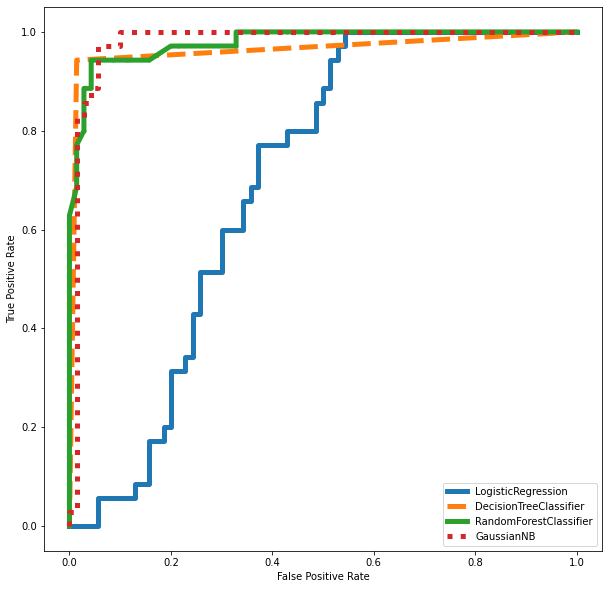

In [55]:
# 차트의 모양
plt.figure(figsize=(10,10))

for key, ( line_style, model ) in als.items():
  # 학습
  model.fit( X_train, y_train )
  # 예측 
  '''
    [
      [0.91842269 0.08157731] => [ False(0)로 예측할 확률, True(1)로 예측할 확률 ]
    ]
    여기서는 True(1)로 예측할 확률를 사용하여 auc, roc 계산 수행
  '''
  pred = model.predict_proba( X_test )  
  #print( pred[:, -1] )
  pred_t = pred[:, -1]
  # 성능평가 - auc, roc
  fpr, tpr, _ = roc_curve( y_test.values, pred_t )
  # 시각화 (x축:거짓긍정비율(1-특이성), y축:참긍정비율(센시티브, 민감도), 
  # 그래프의 하위 면적 AUC:이값이 가장 높은 알고리즘을 선택한다 -> 성능이 좋다 )
  plt.plot( fpr, tpr, line_style, lineWidth=5, label=key );
  print( key, auc( fpr, tpr )  )
  #break

# x축 라벨
plt.xlabel('False Positive Rate')
# y축 라벨
plt.ylabel('True Positive Rate')
plt.legend()

# 차트 출력
plt.show();

- 해석
  - GaussianNB가 AUC값이 가장 높다
  - 현 데이터 기준에서는 AUC값이 높아서 GaussianNB 가 가장 좋은 모델이다
    - 현재 상황에서는 데이터도 제한적, 훈련용을 과대로 올렸고, 튜닝은 1도 않했음
    - 알고리즘 개별 상황은 신경쓰지 않음

## 시스템 통합(생략)